<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner code, texte et graphiques.

Cet outil est formidable pour plusieurs raisons:

+ Il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'une instruction, de la corriger si nécessaire.
+ Il permet aussi de rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ Il est possible d'ajouter des graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandé.

Et gardez à l'esprit qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
#importation des librairies nessecaires à nos analyses.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Kilian\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir dans Google les mots clés "display all columns dataframe Pandas" par exemple.
#Dans les résultats de la recherche, privilégier les solutions provenant de Stack Overflow ou Medium


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
erp = pd.read_excel('erp.xlsx')

#Importation du fichier liaison.xlsx

liaison = pd.read_excel('liaison.xlsx')


C:\Users\Kilian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Kilian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Kilian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [6]:
#Consulter le nombre de colonnes
nb_colonnes = erp.shape[1]
print(f"Le fichier contient {nb_colonnes} colonnes.")

#La nature des données dans chacune des colonnes
print("\n--- Nature des données (Types) ---")
print(erp.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print("\n--- Nombre de valeurs présentes (non nulles) ---")
print(erp.count())


Le fichier contient 6 colonnes.

--- Nature des données (Types) ---
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

--- Nombre de valeurs présentes (non nulles) ---
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [7]:
#Afficher les 5 premières lignes de la table
erp.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [8]:
#Vérifier si il y a des lignes en doublon dans la colonne product_id

doublons_pid = erp.duplicated(subset=['product_id']).sum()

print(f"Nombre de doublons dans product_id : {doublons_pid}")

if doublons_pid == 0:
    print("La colonne product_id est une clé primaire valide (pas de doublons).")
else:
    print("Attention : Il y a des doublons à traiter.")

Nombre de doublons dans product_id : 0
La colonne product_id est une clé primaire valide (pas de doublons).


In [9]:
#Afficher les valeurs distinctes de la colonne stock_status

valeurs_statut = erp['stock_status'].unique()
print(f"Valeurs possibles pour le statut : {valeurs_statut}")

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
# On regarde la relation avec la quantité de stock
# On groupe par statut pour voir les statistiques de la colonne stock_quantity
print("\n--- Relation Statut vs Quantité ---")
print(erp.groupby('stock_status')['stock_quantity'].describe())

Valeurs possibles pour le statut : ['instock' 'outofstock']

--- Relation Statut vs Quantité ---
              count       mean        std   min   25%   50%   75%    max
stock_status                                                            
instock       733.0  24.309686  21.793200   0.0  10.0  21.0  31.0  145.0
outofstock     92.0  -0.086957   1.095968 -10.0   0.0   0.0   0.0    3.0


In [10]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#Si la valeur de la colonne "stock_quantity" est nulle, renseigner "outofstock" sinon mettre "instock"

erp['stock_status_2'] = np.where(erp['stock_quantity'] == 0, 'outofstock', 'instock')
# Comparaison pour identifier les erreurs
erreurs_statut = erp[erp['stock_status'] != erp['stock_status_2']]

print(f"Nombre d'incohérences détectées : {len(erreurs_statut)}")
# Afficher les erreurs pour analyse
erreurs_statut[['product_id', 'stock_quantity', 'stock_status', 'stock_status_2']]

Nombre d'incohérences détectées : 4


,product_id,stock_quantity,stock_status,stock_status_2
4,4039,3,outofstock,instock
398,4885,0,instock,outofstock
449,4973,-10,outofstock,instock
573,5700,-1,outofstock,instock


In [11]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
correspondance = erp["stock_status"] == erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter
if correspondance.all():
    print("Les colonnes stock_status et stock_status_2 sont strictement identiques.")
else:
    print("Il y a des différences entre les deux colonnes.")
    
    # 2. Compter le nombre d'erreurs
    nb_erreurs = (~correspondance).sum() # Le tilde ~ inverse True/False pour compter les erreurs
    print(f"Nombre de divergences détectées : {nb_erreurs}")
    
    # 3. Afficher les lignes problématiques pour analyse
    print("\nVoici les lignes où le statut ne correspond pas à la quantité :")
    # On filtre le DataFrame original avec notre masque de comparaison inversé
    erreurs = erp[~correspondance]
    display(erreurs[['product_id', 'stock_quantity', 'stock_status', 'stock_status_2']])

Il y a des différences entre les deux colonnes.
Nombre de divergences détectées : 4

Voici les lignes où le statut ne correspond pas à la quantité :


,product_id,stock_quantity,stock_status,stock_status_2
4,4039,3,outofstock,instock
398,4885,0,instock,outofstock
449,4973,-10,outofstock,instock
573,5700,-1,outofstock,instock


In [12]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
# Synthèse du résultat par la somme
# True = 1, False = 0. La somme donne le nombre de correspondances exactes.
nb_correspondances = (erp["stock_status"] == erp["stock_status_2"]).sum()

print(f"Nombre de lignes conformes : {nb_correspondances}")
print(f"Nombre total de lignes attendues : {len(erp)}")

# Calcul du taux de conformité
taux_conformite = nb_correspondances / len(erp) * 100
print(f"Taux de conformité : {taux_conformite:.2f}%")

Nombre de lignes conformes : 821
Nombre total de lignes attendues : 825
Taux de conformité : 99.52%


In [13]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous donne ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
# Création d'un filtre (masque) booléen
# On cherche les lignes où les deux colonnes sont différentes
filtre_ecart = erp["stock_status"] != erp["stock_status_2"]

# Application du filtre au DataFrame pour afficher uniquement les lignes concernées
lignes_en_ecart = erp[filtre_ecart]

# Affichage des colonnes pertinentes pour analyser l'écart
print("Voici les lignes où le statut ne correspond pas à la quantité :")
lignes_en_ecart[['product_id', 'stock_quantity', 'stock_status', 'stock_status_2']]

Voici les lignes où le statut ne correspond pas à la quantité :


,product_id,stock_quantity,stock_status,stock_status_2
4,4039,3,outofstock,instock
398,4885,0,instock,outofstock
449,4973,-10,outofstock,instock
573,5700,-1,outofstock,instock


In [14]:
#Corriger la ou les données incohérentes
erp.loc[erp['stock_quantity'] < 0, 'stock_quantity'] = 0
#Vérification en utilisant le même code que plus haut pour afficher les problèmes
# Correction : On applique la valeur calculée (stock_status_2) dans la colonne originale (stock_status)
# On part du principe que la quantité (stock_quantity) fait foi.
erp['stock_status'] = erp['stock_status_2']

# Vérification finale (même code que précédemment)
nb_correspondances = (erp["stock_status"] == erp["stock_status_2"]).sum()

print(f"Nombre de lignes conformes après correction : {nb_correspondances}")
print(f"Nombre total de lignes : {len(erp)}")

if nb_correspondances == len(erp):
    print("Succès : Toutes les incohérences de statut ont été corrigées.")
else:
    print("Attention : Il reste des différences.")

Nombre de lignes conformes après correction : 825
Nombre total de lignes : 825
Succès : Toutes les incohérences de statut ont été corrigées.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [15]:
###############
## LES PRIX  ##
###############

# 1. Nombres d'articles avec un prix non renseigné
# On utilise isnull().sum() pour compter les valeurs manquantes
nb_nan = erp['price'].isnull().sum()
print("Nombres d'articles avec un prix non renseigné: {}".format(nb_nan))

# 2. Afficher le prix minimum de la colonne "price"
prix_min = erp['price'].min()
print(f"Le prix minimum est de : {prix_min} €")

# 3. Afficher le prix maximum de la colonne "price"
prix_max = erp['price'].max()
print(f"Le prix maximum est de : {prix_max} €")

# 4. Afficher les prix inférieurs ou égaux à 0
prix_negatifs_ou_nuls = erp[erp['price'] <= 0]
print(f"Nombre d'articles avec un prix aberrant (<= 0) : {len(prix_negatifs_ou_nuls)}")

# Visualisation des lignes aberrantes si elles existent
if not prix_negatifs_ou_nuls.empty:
    print("Détail des prix aberrants :")
    display(prix_negatifs_ou_nuls)


Nombres d'articles avec un prix non renseigné: 0
Le prix minimum est de : -20.0 €
Le prix maximum est de : 225.0 €
Nombre d'articles avec un prix aberrant (<= 0) : 3
Détail des prix aberrants :


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [16]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
print("Nombres d'articles avec un stock non renseigné: {}".format(erp['stock_quantity'].isnull().sum()))
#Afficher la quantité minimum de la colonne "stock_quantity"
print("Stock minimum: {}".format(erp['stock_quantity'].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("Prix maximum: {}".format(erp['stock_quantity'].max()))
#Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
stock_negatifs = erp[erp['stock_quantity'] < 0]
print("\nVoici les articles avec un stock négatif :")
display(stock_negatifs)

#les stocks négatifs ont été remis a 0 pour éviter de fausser nos analyses

Nombres d'articles avec un stock non renseigné: 0
Stock minimum: 0
Prix maximum: 145

Voici les articles avec un stock négatif :


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


In [17]:
erp.loc[erp['stock_quantity'] < 0, 'stock_quantity'] = 0
print(len(erp[erp['stock_quantity'] >= 0]))

825


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [18]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?
# Vérification des valeurs de la colonne onsale_web
print("Valeurs uniques :", erp['onsale_web'].unique())
print("\nRépartition des valeurs :")
print(erp['onsale_web'].value_counts())

Valeurs uniques : [1 0]

Répartition des valeurs :
onsale_web
1    716
0    109
Name: count, dtype: int64


In [19]:
#Quelles sont les colonnes à conserver selon vous?
#les différentes colonnes disposant de données utiles a nos futures analyses sont selon moi :
cols_erp = ['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status', 'purchase_price']

In [20]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
cols_erp = ['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status', 'purchase_price']
erp = erp[cols_erp]



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [21]:
######################
##   prix d'achat   ##
######################
# Vérification de la colonne purchase_price

# 1. Nombre de prix d'achat non renseignés
print("Nombres d'articles avec un prix d'achat non renseigné: {}".format(erp['purchase_price'].isnull().sum()))

# 2. Prix d'achat minimum
print("Prix d'achat minimum: {}".format(erp['purchase_price'].min()))

# 3. Prix d'achat maximum
print("Prix d'achat maximum: {}".format(erp['purchase_price'].max()))


Nombres d'articles avec un prix d'achat non renseigné: 0
Prix d'achat minimum: 2.74
Prix d'achat maximum: 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [22]:

# Dimension du dataset (tuple : lignes, colonnes)
print("Dimensions du dataset : {}".format(web.shape))

# Nombre d'observations (Lignes)
print("Nombre d'observations : {}".format(web.shape[0]))

# Nombre de caractéristiques (Colonnes)
print("Nombre de caractéristiques : {}".format(web.shape[1]))

Dimensions du dataset : (1513, 29)
Nombre d'observations : 1513
Nombre de caractéristiques : 29


In [23]:
# 1. Consulter le nombre de colonnes
# .shape renvoie (nombre_lignes, nombre_colonnes), on prend l'index [1] pour les colonnes
nb_colonnes = web.shape[1]
print(f"Le fichier contient {nb_colonnes} colonnes.")

# 2. La nature des données dans chacune des colonnes
# .dtypes liste le type de chaque colonne (int64, float64, object/texte...)
print("\n--- Nature des données (Types) ---")
print(web.dtypes)

# 3. Le nombre de valeurs présentes dans chacune des colonnes
# .count() compte les valeurs non nulles
print("\n--- Nombre de valeurs présentes (non nulles) ---")
print(web.count())

# ASTUCE : La commande qui résume tout cela en une seule fois est :
# print(erp.info())

Le fichier contient 29 colonnes.

--- Nature des données (Types) ---
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent

In [24]:
web = web[web['post_type'] == 'product']
#filtre sur les type de produits pour exlure les attachements
web.head(50)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,14692,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-03-19 10:06:47,...,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15328,0,0,0,0.0,2.0,taxable,NaN,2.0,2019-03-27 18:05:09,...,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,16515,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-06-02 09:31:31,...,chateau-turcaud-bordeaux-rouge-cuvee-majeure-2018,2020-08-27 10:11:12,2020-08-27 08:11:12,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
11,16585,0,0,0,0.0,15.0,taxable,NaN,2.0,2018-02-16 14:03:16,...,xavier-frissant-touraine-sauvignon-2019,2020-08-27 09:30:36,2020-08-27 07:30:36,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
14,12869,0,0,0,0.0,7.0,taxable,NaN,2.0,2019-03-28 14:29:35,...,stephane-tissot-arbois-dd-2016,2019-12-13 15:40:01,2019-12-13 14:40:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
15,15575,0,0,0,0.0,11.0,taxable,NaN,2.0,2018-04-17 16:29:35,...,chateau-plaisance-fronton-2017,2020-07-31 10:25:02,2020-07-31 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
17,14338,0,0,0,0.0,16.0,taxable,NaN,2.0,2019-03-15 10:13:30,...,maurel-pays-d-oc-cabernet-sauvignon-2017,2020-03-11 09:30:06,2020-03-11 08:30:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
19,16560,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-02-15 09:12:13,...,borie-vitarele-saint-chinian-terres-blanches-2019,2020-08-25 10:25:02,2020-08-25 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
21,15361,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-04-17 22:01:10,...,domaine-schoenheitz-muscat-2017,2020-07-27 14:25:03,2020-07-27 12:25:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
24,15022,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 13:14:22,...,oratoire-saint-martin-cairanne-douyes-2016,2020-08-27 18:45:02,2020-08-27 16:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [25]:
#Selon vous, quelles sont les colonnes à conserver ?
#Sku : clé de jointure / Total_sales : quantité vendue/ post_title: nom du produit / post_type: pour le filtrage
web = web[['sku', 'total_sales','post_date', 'post_title','product_type', 'post_type']]


In [26]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
print("Colonnes conservées pour le WEB :")
print(web.columns.tolist())

Colonnes conservées pour le WEB :
['sku', 'total_sales', 'post_date', 'post_title', 'product_type', 'post_type']


In [27]:
web.head(20)

,sku,total_sales,post_date,post_title,product_type,post_type
2,14692,5.0,2019-03-19 10:06:47,Château Fonréaud Bordeaux Blanc Le Cygne 2016,Vin,product
4,15328,2.0,2019-03-27 18:05:09,Agnès Levet Côte Rôtie Maestria 2017,Vin,product
6,16515,10.0,2018-06-02 09:31:31,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,Vin,product
11,16585,15.0,2018-02-16 14:03:16,Xavier Frissant Touraine Sauvignon 2019,Vin,product
14,12869,7.0,2019-03-28 14:29:35,Stéphane Tissot Arbois D.D. 2016,Vin,product
15,15575,11.0,2018-04-17 16:29:35,Château Plaisance Fronton Rouge 2017,Vin,product
17,14338,16.0,2019-03-15 10:13:30,Maurel Pays d'Oc Cabernet-Sauvignon 2017,Vin,product
19,16560,13.0,2018-02-15 09:12:13,Borie La Vitarèle Saint-Chinian Les Terres Bla...,Vin,product
21,15361,13.0,2018-04-17 22:01:10,Domaine Schoenheitz Muscat 2017,Vin,product
24,15022,0.0,2018-02-12 13:14:22,Oratoire Saint Martin Cairanne Rouge Les Douye...,Vin,product


In [28]:

# Identification des SKU qui ne sont pas purement numériques
# On convertit en string et on regarde si c'est composé uniquement de chiffres
sku_atypiques = web[~web['sku'].astype(str).str.isdigit()]

print("Voici les valeurs de SKU atypiques :")
print(sku_atypiques['sku'].unique())


Voici les valeurs de SKU atypiques :
['13127-1' nan 'bon-cadeau-25-euros']


In [29]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les
sku_atypiques = web[web['sku'].notnull() & ~web['sku'].astype(str).str.isdigit()]

print("Articles avec des codes SKU spécifiques :")
display(sku_atypiques)

# 2. (Optionnel) Regarder les lignes où le SKU est vide (NaN) pour info
sku_vides = web[web['sku'].isnull()]
print(f"\nNombre de lignes sans SKU : {len(sku_vides)}")

Articles avec des codes SKU spécifiques :


,sku,total_sales,post_date,post_title,product_type,post_type
272,13127-1,4.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Vin,product
1387,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,Bon cadeau de 25€,NaN,product



Nombre de lignes sans SKU : 2


In [30]:
#Identifier les lignes sans code article
# Identification des lignes sans SKU (Not a Number)
lignes_sans_sku = web[web['sku'].isnull()]

print(f"Nombre de lignes sans code article : {len(lignes_sans_sku)}")

# Affichage pour contrôle
print("Aperçu de ces lignes :")
display(lignes_sans_sku.head())

Nombre de lignes sans code article : 2
Aperçu de ces lignes :


,sku,total_sales,post_date,post_title,product_type,post_type
1084,NaN,-56.0,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,Vin,product
1087,NaN,-17.0,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,Vin,product


In [31]:
#Pour les codes articles identifiés, réaliser une analyse et définir l'action à entreprendre
#Nous avons supprimé les lignes sans SKU (impossibles à lier). En revanche, nous avons conservé les références 'bon-cadeau-25-euros' et '13127-1' car ce sont des produits valides générant du chiffre d'affaires, bien que leur codification soit atypique."
web = web.dropna(subset=['sku'])

In [32]:
#La clé pour chaque ligne est-elle unique? autrement dit, y a-t-il des doublons?
sku_renseignes = web[web['sku'].notnull()]
if sku_renseignes['sku'].is_unique:
    print("Web : La clé 'sku' est unique.")
else:
    nb_doublons_sku = sku_renseignes.duplicated('sku').sum()
    print(f"Web : Il y a {nb_doublons_sku} doublons de SKU.")

Web : La clé 'sku' est unique.


In [33]:
#Les lignes sans code article semblent être toutes non renseignées
#Pour s'en assurer, réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
web_full = pd.read_excel('web.xlsx')
#2 - Utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeurs renseignées dans chacune des colonnes
df_nan = web_full[web_full['sku'].isnull()]
print("Structure des lignes sans SKU :")
df_nan.info()
#3 - Que constatez-vous?

# il n'y a que 2 valeurs renseigné sur 85, 83 sont vides de toutes informations commercialle, les ligne sans sku n'apportent aucune valeur sauf 2 a traiter manuellement

Structure des lignes sans SKU :
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           2 non-null    

C:\Users\Kilian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [34]:


# Dimension du dataset
print("Dimensions du dataset liaison : {}".format(liaison.shape))

# Nombre d'observations
print("Nombre d'observations : {}".format(liaison.shape[0]))

# Nombre de caractéristiques
print("Nombre de caractéristiques : {}".format(liaison.shape[1]))


Dimensions du dataset liaison : (825, 2)
Nombre d'observations : 825
Nombre de caractéristiques : 2


In [35]:
# 1. Consulter le nombre de colonnes
print("Nombre de colonnes : {}".format(liaison.shape[1]))

# 2. La nature des données dans chacune des colonnes
print("\nTypes de données :")
print(liaison.dtypes)

# 3. Le nombre de valeurs présentes dans chacune des colonnes
print("\nValeurs présentes :")
print(liaison.count())


Nombre de colonnes : 2

Types de données :
id_web        object
product_id     int64
dtype: object

Valeurs présentes :
id_web        734
product_id    825
dtype: int64


In [36]:
#renommage de la colonne id_web en sku pour avoir une correspondances pour nos futur merge
liaison.rename(columns={'id_web': 'sku'}, inplace=True)

In [37]:
#Les valeurs de la colonne "product_id" sont-elles toutes uniques?
# Vérification des doublons dans la colonne product_id du fichier liaison
nb_doublons = liaison.duplicated('product_id').sum()

print(f"Nombre de doublons sur la colonne product_id : {nb_doublons}")

if nb_doublons == 0:
    print(" Chaque produit est unique dans la table de liaison.")
else:
    print(f" Attention : Il y a {nb_doublons} doublons.")

Nombre de doublons sur la colonne product_id : 0
 Chaque produit est unique dans la table de liaison.


In [38]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
# On filtre d'abord pour ne garder que les lignes où id_web est renseigné (non nul)
liaison_valide = liaison[liaison['sku'].notnull()]

# On vérifie l'unicité sur ces valeurs
if liaison_valide['sku'].is_unique:
    print(" Tous les sku renseignés sont uniques.")
else:
    nb_doublons = liaison_valide.duplicated('sku').sum()
    print(f" Attention : Il y a {nb_doublons} doublons dans sku.")

 Tous les sku renseignés sont uniques.


In [39]:
#Avons-nous des articles sans correspondance?
# Filtrer les lignes où 'id_web' est nul (NaN)
articles_non_lies = liaison[liaison['sku'].isnull()]

# Compter le nombre de lignes
nb_articles_non_lies = len(articles_non_lies)

print(f"Nombre d'articles sans correspondance Web : {nb_articles_non_lies}")

# Afficher les identifiants produits concernés (pour info)
print("\nVoici les product_id qui n'ont pas de lien Web :")
print(articles_non_lies['product_id'].values)

Nombre d'articles sans correspondance Web : 91

Voici les product_id qui n'ont pas de lien Web :
[4055 4090 4092 4195 4209 4233 4278 4279 4565 4577 4578 4594 4599 4659
 4692 4693 4697 4698 4702 4721 4738 4744 4798 4874 4911 4973 5017 5020
 5070 5075 5560 5569 5805 5808 5952 6125 6324 6327 6594 6821 6824 6825
 6826 6864 6866 6869 6875 6898 6899 6900 6901 6902 6903 6904 6905 6906
 6907 6908 6909 7008 7009 7010 7015 7081 7084 7085 7086 7087 7088 7131
 7132 7133 7136 7137 7159 7161 7162 7163 7164 7168 7169 7170 7192 7193
 7194 7195 7196 7200 7201 7203 7204]


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [40]:


df_merge = pd.merge(erp, liaison, on='product_id',  how='outer', indicator=True)
# Vérification des dimensions
print(f"Dimensions du fichier fusionné : {df_merge.shape}")

# Aperçu du résultat
display(df_merge.head())

Dimensions du fichier fusionné : (825, 8)


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,_merge
0,3847,1,24.2,16,instock,12.88,15298,both
1,3849,1,34.3,10,instock,17.54,15296,both
2,3850,1,20.8,0,outofstock,10.64,15300,both
3,4032,1,14.1,26,instock,6.92,19814,both
4,4039,1,46.0,3,instock,23.77,19815,both


In [41]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
# Fusion avec l'argument 'indicator=True' pour voir la source de chaque ligne
verif_correspondance = pd.merge(erp['product_id'], liaison['product_id'], on='product_id', how='outer', indicator=True)

# Comptage des valeurs dans la colonne '_merge'
print(verif_correspondance['_merge'].value_counts())

_merge
both          825
left_only       0
right_only      0
Name: count, dtype: int64


In [42]:
#toutes les lignes "matchent"

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [43]:

# On utilise 'sku' comme clé commune
if '_merge' in df_merge.columns:
    df_merge = df_merge.drop(columns=['_merge'])
df_final = pd.merge(df_merge, web, on='sku', how='outer', indicator=True)



In [44]:
display(df_final.head())

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_date,post_title,product_type,post_type,_merge
0,4729,1,8.6,26,instock,4.22,38,10.0,2018-04-18 12:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,Vin,product,both
1,4634,1,41.0,11,instock,20.12,41,6.0,2018-04-14 12:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Vin,product,both
2,4141,1,39.0,123,instock,24.86,304,8.0,2018-02-13 12:57:44,Champagne Gosset Grande Réserve,Champagne,product,both
3,5932,1,59.9,13,instock,27.18,523,0.0,2019-04-06 15:25:58,Cognac Normandin Mercier VFC,Cognac,product,both
4,5047,1,22.5,76,instock,13.78,531,8.0,2018-07-18 15:58:02,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,Champagne,product,both


In [45]:
#Avons-nous des lignes sans correspondance?
# On compte les valeurs manquantes dans la colonne 'sku' issue de la fusion
nb_orphelins = df_final['sku'].isna().sum()

print(f"Nombre de produits ERP sans correspondance sur le Web : {nb_orphelins}")
#des produits sont vendu en boutique sans l'étre sur le site web.

Nombre de produits ERP sans correspondance sur le Web : 91


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [46]:
df_final['total_sales'] = df_final['total_sales'].fillna(0)
df_final['stock_quantity'] = df_final['stock_quantity'].fillna(0)
df_final = df_final.dropna(subset=['post_title'])

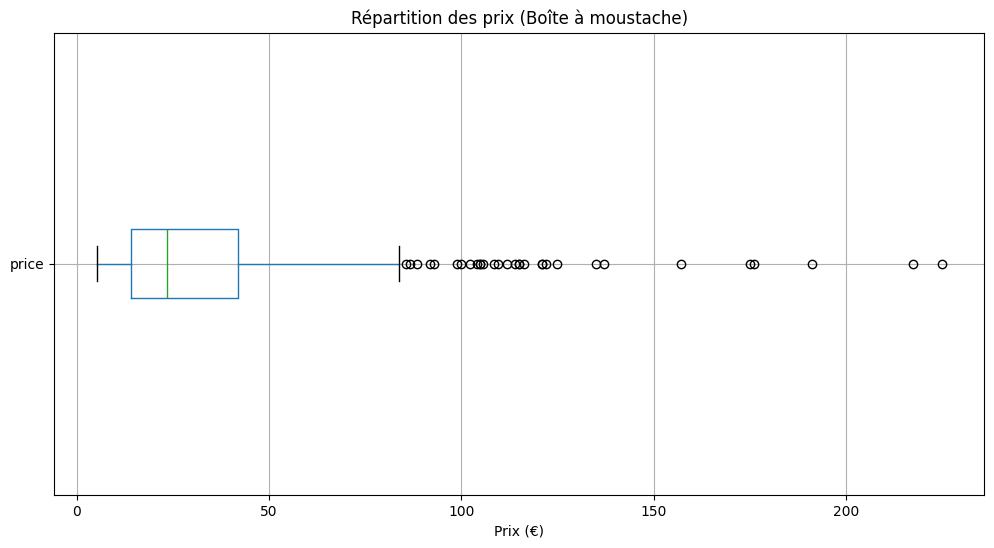

In [47]:
#Création d'une boîte à moustache de la répartition des prix grâce à Pandas
plt.figure(figsize=(12, 6))
df_final.boxplot(column='price', vert=False)
plt.title('Répartition des prix (Boîte à moustache)')
plt.xlabel('Prix (€)')
plt.show()

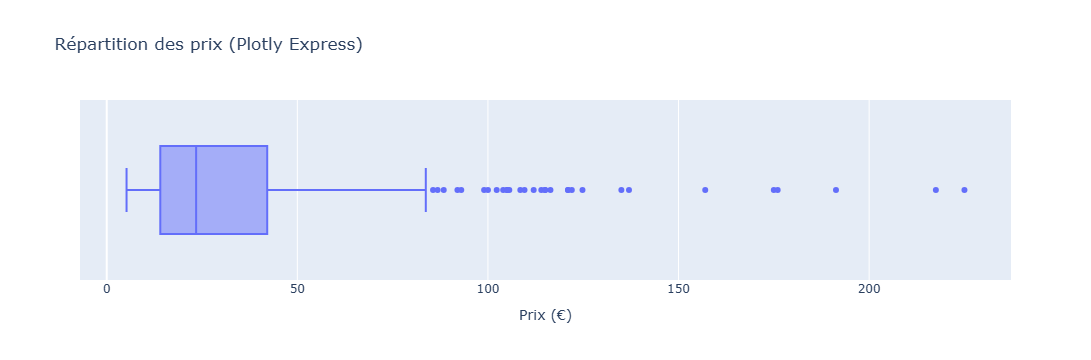

In [48]:
#Autre méthode avec plotly express
import plotly.express as px

# Création de la boîte à moustache avec Plotly Express
# x='price' pour avoir une boîte horizontale
# points='outliers' affiche uniquement les valeurs aberrantes (par défaut)
fig = px.box(df_final, x="price", title="Répartition des prix (Plotly Express)")

# Mise en formes
fig.update_layout(xaxis_title="Prix (€)")

# Affichage
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistiques</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [49]:
#Calculer la moyenne du prix
prix_moy = df_final['price'].mean()
print(f"Moyenne du prix : {prix_moy:.2f} €")
#Calculer l'écart-type du prix
ecart_type = df_final['price'].std()
print(f"Écart-type du prix : {ecart_type:.2f} €")
#Calculer le Z-score
df_final['z_score'] = (df_final['price'] - prix_moy) / ecart_type
print("\nAperçu des 5 premiers Z-scores :")
print(df_final[['product_id', 'post_title', 'price', 'z_score']].head())

Moyenne du prix : 32.33 €
Écart-type du prix : 27.60 €

Aperçu des 5 premiers Z-scores :
   product_id                                         post_title  price  \
0        4729         Emile Boeckel Crémant Brut Blanc de Blancs    8.6   
1        4634  Marcel Windholtz Eau de Vie de Marc de Gewurzt...   41.0   
2        4141                    Champagne Gosset Grande Réserve   39.0   
3        5932                       Cognac Normandin Mercier VFC   59.9   
4        5047  Champagne Petit Lebrun &amp; Fils Blanc de Bla...   22.5   

    z_score  
0 -0.860030  
1  0.314039  
2  0.241565  
3  0.998912  
4 -0.356340  


In [50]:
#Quel est le seuil prix dont le z-score est supérieur à 3?
seuil_z3 = prix_moy + (3 * ecart_type)
print(f"Le seuil de prix correspondant à un Z-score de 3 est de : {seuil_z3:.2f} €")
outliers_z3 = df_final[df_final['z_score'] > 3]
print(f"Nombre d'outliers détectés (Z-score > 3) : {len(outliers_z3)}")

Le seuil de prix correspondant à un Z-score de 3 est de : 115.12 €
Nombre d'outliers détectés (Z-score > 3) : 13


In [51]:
print("\nListe des outliers (Z-score > 3) :")
display(outliers_z3[['product_id', 'post_title', 'price', 'z_score']].sort_values(by='price', ascending=False))


Liste des outliers (Z-score > 3) :


,product_id,post_title,price,z_score
567,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,6.981591
204,5001,David Duband Charmes-Chambertin Grand Cru 2014,217.5,6.709816
269,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,5.760415
24,4402,Cognac Frapin VIP XO,176.0,5.205993
313,5767,Camille Giroud Clos de Vougeot 2016,175.0,5.169756
33,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,4.517496
171,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,3.792762
257,6126,Champagne Gosset Célébris Vintage 2007,135.0,3.720288
256,5612,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8,3.350674
235,5917,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,122.0,3.249211


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [52]:
#Utilisation de la fonction "describe" de Pandas pour l'étude des mesures de dispersion
print("--- Statistiques descriptives ---")
stats = df_final['price'].describe()
print(stats)

--- Statistiques descriptives ---
count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64


In [53]:
###Calcul des quartiles et de l'IQR
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nQ1 (25%) : {Q1:.2f} €")
print(f"Q3 (75%) : {Q3:.2f} €")
print(f"IQR (Écart Interquartile) : {IQR:.2f}")


Q1 (25%) : 14.06 €
Q3 (75%) : 42.08 €
IQR (Écart Interquartile) : 28.01


In [54]:
#Définir un seuil pour les articles "outliers" en prix
borne_superieure = Q3 + (1.5 * IQR)
borne_inferieure = Q1 - (1.5 * IQR) # Souvent inutile ici car le prix ne peut être négatif

print(f"Borne supérieure (Seuil Outlier) : {borne_superieure:.2f} €")

Borne supérieure (Seuil Outlier) : 84.09 €


In [55]:
#Définir le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
outliers_iqr = df_final[df_final['price'] > borne_superieure]
nb_outliers = len(outliers_iqr)
proportion = (nb_outliers / len(df_final)) * 100

print(f"\nNombre d'outliers détectés : {nb_outliers}")
print(f"Proportion des outliers dans le catalogue : {proportion:.2f}%")


Nombre d'outliers détectés : 31
Proportion des outliers dans le catalogue : 4.34%


In [56]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#Oui cela semble justifier, la distribution des prix des vins et spiritueux ne sont pas normal, on peut parfaitement avoir une grande quantité de vins entre 5 et 20 euros et une petite quantité de produits de luxe avec des prix extremement important.
#pour le démontré on va analyser le nom des produits les plus chéres, si on voit grand cru, millésimes avec des années anciennes, alors le prix élevé sera justifié par la nature de ce produit

In [57]:
print("Analyse qualitative des outliers :")
print("-" * 30)
analyse_outliers = outliers_iqr[['product_id', 'post_title', 'price', 'stock_quantity']].sort_values(by='price', ascending=False)
pd.set_option('display.max_rows', None) # Pour être sûr de tout voir
display(analyse_outliers)
pd.reset_option('display.max_rows') # On remet l'option par défaut après

Analyse qualitative des outliers :
------------------------------


,product_id,post_title,price,stock_quantity
567,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,0
204,5001,David Duband Charmes-Chambertin Grand Cru 2014,217.5,18
269,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,98
24,4402,Cognac Frapin VIP XO,176.0,11
313,5767,Camille Giroud Clos de Vougeot 2016,175.0,12
33,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,12
171,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,9
257,6126,Champagne Gosset Célébris Vintage 2007,135.0,138
256,5612,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8,19
235,5917,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,122.0,12


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [58]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article
df_final['ca_par_article'] = df_final['price'] * df_final['total_sales']
#Calculer la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web
ca_total = df_final[df_final['total_sales'] > 0]['ca_par_article'].sum()

print(f"Chiffre d'Affaires total du site web : {ca_total:,.2f} €")

Chiffre d'Affaires total du site web : 143,680.10 €


Top 20 des produits par Chiffre d'Affaires :


,product_id,post_title,price,total_sales,ca_par_article
0,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,11.0,2475.0
1,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,6.0,1147.8
2,4353,Champagne Egly-Ouriet Grand Cru Brut Rosé,79.5,14.0,1113.0
3,5826,Agnès Levet Côte Rôtie Améthyste 2017,41.2,20.0,824.0
4,6212,Domaine des Comtes Lafon Volnay 1er Cru Santen...,115.0,7.0,805.0
5,5026,Champagne Agrapart &amp; Fils Minéral Extra Br...,86.8,9.0,781.2
6,5008,Domaine des Comtes Lafon Volnay 1er Cru Santen...,105.0,7.0,735.0
7,5767,Camille Giroud Clos de Vougeot 2016,175.0,4.0,700.0
8,6126,Champagne Gosset Célébris Vintage 2007,135.0,5.0,675.0
9,5025,Champagne Agrapart &amp; Fils L'Avizoise Extra...,112.0,6.0,672.0


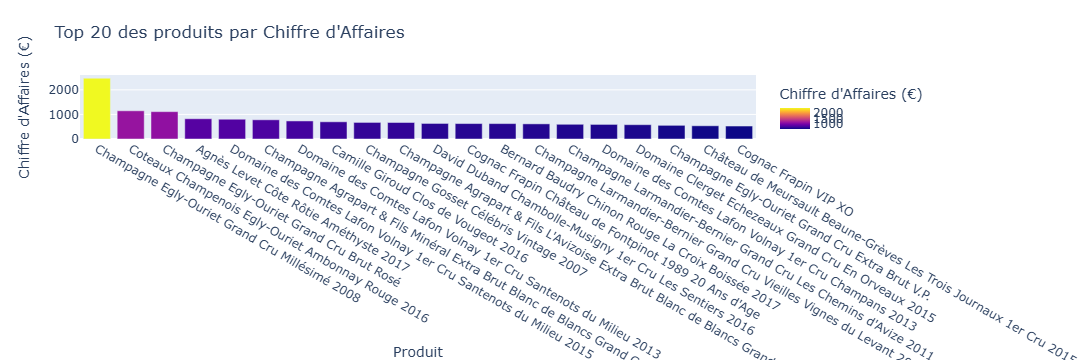

In [59]:
###############################
# Palmarès des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
top_ca = df_final.sort_values(by='ca_par_article', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
top_ca = top_ca.reset_index(drop=True)
#Afficher les 20 premiers articles en CA
print("Top 20 des produits par Chiffre d'Affaires :")
display(top_ca[['product_id', 'post_title', 'price', 'total_sales', 'ca_par_article']].head(20))
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(top_ca.head(20), 
             x='post_title', 
             y='ca_par_article',
             title="Top 20 des produits par Chiffre d'Affaires",
             labels={'ca_par_article': 'Chiffre d\'Affaires (€)', 'post_title': 'Produit'},
             color='ca_par_article') # La couleur varie selon le montant
fig.show()

In [60]:
#On travaille uniquement sur les ventes positives pour ne pas fausser le cumul
# On trie par CA décroissant (du plus gros au plus petit)
df_pareto = df_final[df_final['ca_par_article'] > 0].sort_values(by='ca_par_article', ascending=False)
ca_total = df_pareto['ca_par_article'].sum()

In [61]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_pareto['part_ca'] = df_pareto['ca_par_article'] / ca_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_pareto['ca_cumsum'] = df_pareto['part_ca'].cumsum()
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
top_80_ca = df_pareto[df_pareto['ca_cumsum'] <= 0.8]
nombre_articles_80 = len(top_80_ca) + 1
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
total_articles = len(df_final)
proportion = (nombre_articles_80 / total_articles) * 100

print(f"Nombre d'articles pour réaliser 80% du CA : {nombre_articles_80}")
print(f"Proportion du catalogue : {proportion:.2f}%")
print("-" * 30)
print(f"Cela signifie que {proportion:.2f}% de votre catalogue génère 80% de votre chiffre d'affaires.")

Nombre d'articles pour réaliser 80% du CA : 435
Proportion du catalogue : 60.92%
------------------------------
Cela signifie que 60.92% de votre catalogue génère 80% de votre chiffre d'affaires.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en quantité</h3>
</div>

Top 20 des produits par Quantité Vendue :


,product_id,post_title,price,total_sales
0,4867,Château De La Selve IGP Coteaux de l'Ardèche M...,9.9,36.0
1,4203,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,9.9,27.0
2,4275,I Fabbri Chianti Classico Lamole 2017,14.9,24.0
3,4647,Bernard Baudry Chinon Rouge La Croix Boissée 2017,28.5,22.0
4,4726,François Baur Pinot Noir Schlittweg 2017,12.7,22.0
5,5826,Agnès Levet Côte Rôtie Améthyste 2017,41.2,20.0
6,6129,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,5.2,20.0
7,4220,Xavier Frissant Touraine Amboise Chenin Les Pi...,11.6,18.0
8,5778,Maurel Pays d'Oc Merlot 2018,5.8,17.0
9,6569,Decelle-Villa Chorey-Lès-Beaune 2016,29.0,17.0


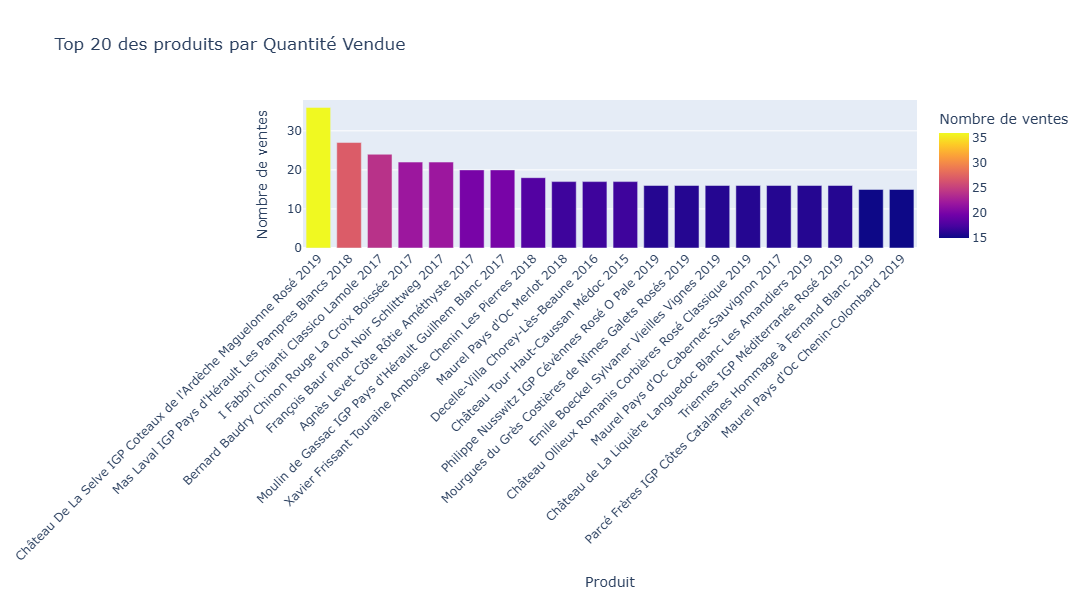

In [62]:
#####################################
# Palmarès des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_qte_vendu = df_final.sort_values(by='total_sales', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_qte_vendu = df_qte_vendu.reset_index(drop=True)
#Afficher les 20 premiers articles en quantité
print("Top 20 des produits par Quantité Vendue :")
display(df_qte_vendu[['product_id', 'post_title', 'price', 'total_sales']].head(20))
#Graphique en barre des 20 premiers articles avec plotly express
top_20_qtv = df_qte_vendu.head(20)

fig = px.bar(top_20_qtv, 
             x='post_title', 
             y='total_sales',
             title="Top 20 des produits par Quantité Vendue",
             labels={'total_sales': 'Nombre de ventes', 'post_title': 'Produit'},
             color='total_sales', # Couleur selon le volume
             height=600)

fig.update_layout(xaxis_tickangle=-45) # Incliner les étiquettes pour lisibilité
fig.show()

In [63]:
df_pareto_qtv = df_final[df_final['total_sales'] > 0].sort_values(by='total_sales', ascending=False)

#on calcule le tottal des ventes en quatité
total_ventes = df_pareto_qtv['total_sales'].sum()

In [64]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_pareto_qtv['part_ventes'] = df_pareto_qtv['total_sales'] / total_ventes
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_pareto_qtv['ventes_cumsum'] = df_pareto_qtv['part_ventes'].cumsum()
#cette fonction additionne les parts lignes par lignes.
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
top_80_qtv = df_pareto_qtv[df_pareto_qtv['ventes_cumsum'] <= 0.8]
nombre_articles_80_qty = len(top_80_qtv) + 1
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
total_articles = len(df_final)
proportion_qty = (nombre_articles_80_qty / total_articles) * 100

print(f"Nombre d'articles pour réaliser 80% des ventes en quantité : {nombre_articles_80_qty}")
print(f"Proportion du catalogue : {proportion_qty:.2f}%")
print("-" * 30)
print(f"Cela signifie que {proportion_qty:.2f}% de votre catalogue génère 80% des volumes de vente.")

Nombre d'articles pour réaliser 80% des ventes en quantité : 434
Proportion du catalogue : 60.78%
------------------------------
Cela signifie que 60.78% de votre catalogue génère 80% des volumes de vente.


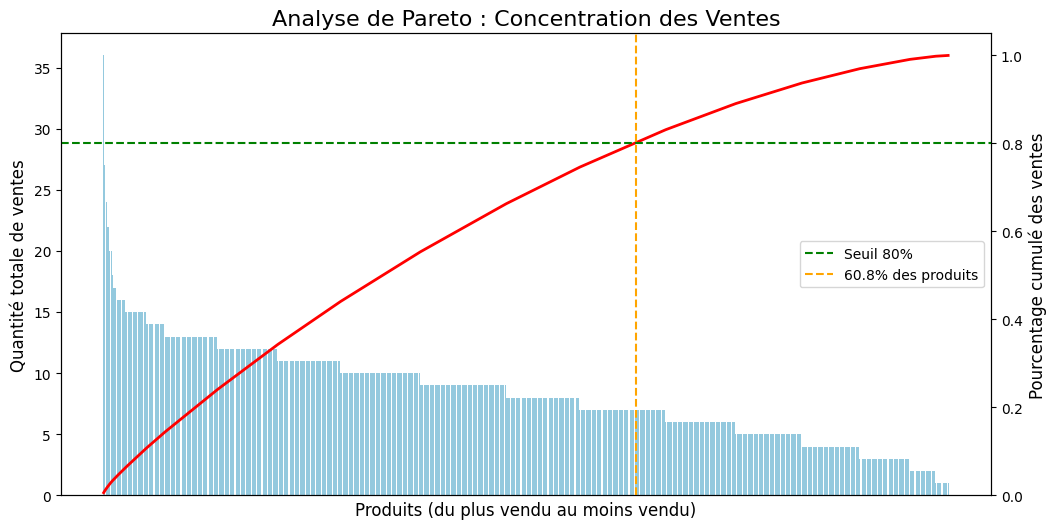

In [82]:
# Préparation des données (on s'assure que c'est trié)
df_plot = df_pareto_qtv.sort_values(by='total_sales', ascending=False).reset_index()
df_plot['index_prod'] = df_plot.index

#Création de la figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Graphique 1 : Barres (Ventes par produit) ---
sns.barplot(x='index_prod', y='total_sales', data=df_plot, ax=ax1, color="skyblue")
ax1.set_title('Analyse de Pareto : Concentration des Ventes', fontsize=16)
ax1.set_xlabel('Produits (du plus vendu au moins vendu)', fontsize=12)
ax1.set_ylabel('Quantité totale de ventes', fontsize=12)
ax1.set_xticks([]) # On cache les labels X car il y a trop de produits

# Ligne de cumul (Courbe de Lorenz) ---
ax2 = ax1.twinx() # Créer un deuxième axe Y
sns.lineplot(x='index_prod', y='ventes_cumsum', data=df_plot, ax=ax2, color="red", linewidth=2)
ax2.set_ylabel('Pourcentage cumulé des ventes', fontsize=12)
ax2.set_ylim(0, 1.05) # De 0 à 100%

# 3. Ajout des lignes "Seuil 80%"
# On dessine une ligne horizontale à 0.8
ax2.axhline(y=0.8, color='green', linestyle='--', label='Seuil 80%')
# On dessine une ligne verticale au point où on atteint 80%
ax2.axvline(x=nombre_articles_80_qty, color='orange', linestyle='--', label=f'{proportion_qty:.1f}% des produits')

plt.legend(loc='center right')
plt.savefig('pareto_ventes.png', dpi=300, bbox_inches='tight')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [65]:
# 1. On s'assure que les dates sont au bon format
df_final.loc[:,'post_date'] = pd.to_datetime(df_final['post_date'], errors='coerce')
df_final.loc[:,'total_sales'] = df_final['total_sales'].abs()

# 2. Calcul du nombre de mois total de la période
date_min = df_final['post_date'].min()
date_max = df_final['post_date'].max()
nb_mois = (date_max - date_min).days / 30.44

print(f"Période analysée : {nb_mois:.1f} mois")

# 3. CRÉATION DE LA COLONNE MANQUANTE (Ventes Mensuelles)
# C'est cette étape qui vous manquait
df_final.loc[:,'ventes_mensuelles'] = df_final['total_sales'] / nb_mois

# 4. Calcul de la couverture de stock (Mois de stock)
# Maintenant que 'ventes_mensuelles' existe, on peut diviser le stock par celle-ci.
# On gère le cas où les ventes sont nulles (ce qui donnerait une erreur) en mettant "Infini" (np.inf)
df_final.loc[:,'mois_de_stock'] = df_final.apply(
    lambda x: x['stock_quantity'] / x['ventes_mensuelles'] if x['ventes_mensuelles'] > 0 else np.inf,
    axis=1
)

# 5. Affichage des produits avec le plus gros stock dormant
print("\nTop 5 des produits avec le plus de mois de stock :")
display(df_final[['product_id', 'post_title', 'stock_quantity', 'ventes_mensuelles', 'mois_de_stock']].sort_values(by='mois_de_stock', ascending=False).head())

Période analysée : 29.3 mois

Top 5 des produits avec le plus de mois de stock :


,product_id,post_title,stock_quantity,ventes_mensuelles,mois_de_stock
692,4198,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,0,0.0,inf
591,4052,Clos du Mont-Olivet Châteauneuf-du-Pape Blanc ...,0,0.0,inf
79,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,97,0.0,inf
39,4396,Wemyss Malts Blended Malt Scotch Whisky The Hi...,0,0.0,inf
680,4876,Tempier Bandol Rosé 2019,0,0.0,inf


In [66]:
#on va réaliser cette analyse en excluant les ventes mensuelle nulle 
df_ventes_actives = df_final[df_final['total_sales'] > 0].copy()
df_ventes_actives['ventes_mensuelles'] = df_ventes_actives['total_sales'] / nb_mois

df_ventes_actives['mois_de_stock'] = (
    df_ventes_actives['stock_quantity'] / df_ventes_actives['ventes_mensuelles'])

print("Top 5 des produits avec le plus de mois de stock (hors ventes nulles) :")
display(df_ventes_actives[['post_title', 'stock_quantity', 'total_sales','ventes_mensuelles', 'mois_de_stock']]
        .sort_values(by='mois_de_stock', ascending=False)
        .head(5))


Top 5 des produits avec le plus de mois de stock (hors ventes nulles) :


,post_title,stock_quantity,total_sales,ventes_mensuelles,mois_de_stock
55,Champagne Gosset Grand Millésime 2006,125,4.0,0.136502,915.735874
257,Champagne Gosset Célébris Vintage 2007,138,5.0,0.170628,808.777924
75,Champagne Egly-Ouriet Premier Cru Les Vignes d...,81,3.0,0.102377,791.195795
76,Champagne Egly-Ouriet Grand Cru Brut Tradition,125,5.0,0.170628,732.588699
14,Champagne Mailly Grand Cru Brut Rosé,71,3.0,0.102377,693.517302


Top 20 des produits avec le plus gros stock dormant (en mois de couverture) :


,post_title,stock_quantity,total_sales,mois_de_stock
55,Champagne Gosset Grand Millésime 2006,125,4.0,915.735874
257,Champagne Gosset Célébris Vintage 2007,138,5.0,808.777924
75,Champagne Egly-Ouriet Premier Cru Les Vignes d...,81,3.0,791.195795
76,Champagne Egly-Ouriet Grand Cru Brut Tradition,125,5.0,732.588699
14,Champagne Mailly Grand Cru Brut Rosé,71,3.0,693.517302
38,Champagne Larmandier-Bernier Latitude,115,5.0,673.981603
16,Champagne Gosset Grand Rosé,91,4.0,666.655716
150,Champagne Agrapart &amp; Fils L'Avizoise Extra...,136,6.0,664.213754
78,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,145,7.0,607.002065
15,Champagne Mailly Grand Cru Intemporelle 2010,123,6.0,600.722733


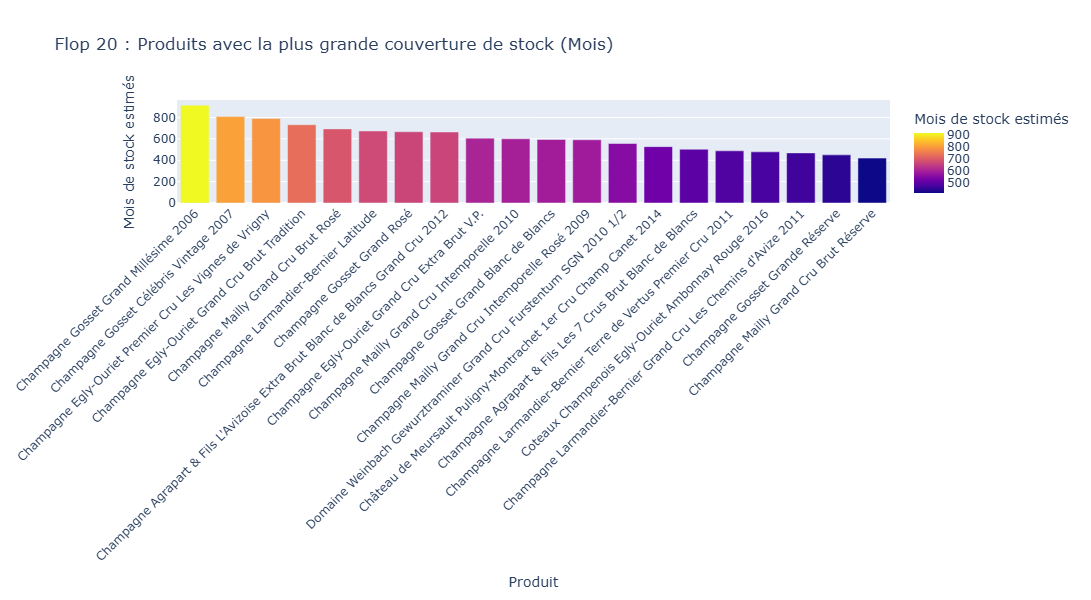

In [67]:
######################################
# Calculer le nombre de mois de stock #
######################################

#Import de numpy deja fait actuellement
# On convertit la colonne post_date en format datetime si ce n'est pas déjà fait
df_final.loc[:,'post_date'] = pd.to_datetime(df_final['post_date'], errors='coerce')
#Création de la colonne Rotation de stock
df_final.loc[:,'mois_de_stock'] = df_final['stock_quantity'] / df_final['ventes_mensuelles']
#Remplacement des "inf" par 0
df_final.loc[:,'mois_de_stock'] = df_final['mois_de_stock'].replace([np.inf, -np.inf], 0)
# On remplace aussi les NaN par 0
df_final.loc[:,'mois_de_stock'] = df_final['mois_de_stock'].fillna(0)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
flop_stock = df_final[df_final['stock_quantity'] > 0].sort_values(by='mois_de_stock', ascending=False).head(20)

print("Top 20 des produits avec le plus gros stock dormant (en mois de couverture) :")
display(flop_stock[['post_title', 'stock_quantity', 'total_sales', 'mois_de_stock']])
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
fig = px.bar(flop_stock, 
             x='post_title', 
             y='mois_de_stock',
             title="Flop 20 : Produits avec la plus grande couverture de stock (Mois)",
             labels={'mois_de_stock': 'Mois de stock estimés', 'post_title': 'Produit'},
             color='mois_de_stock',
             height=600)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [68]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_final.loc[:,'valeur_stock_vente'] = df_final['stock_quantity'] * df_final['price']
total_valeur_vente = df_final['valeur_stock_vente'].sum()
#Calculer la somme de la colonne "Valorisation_stock_euros"
if 'purchase_price' in df_final.columns:
    df_final['valeur_stock_achat'] = df_final['stock_quantity'] * df_final['purchase_price']
    total_valeur_achat = df_final['valeur_stock_achat'].sum()
    print(f"Valorisation du stock (Prix d'achat) : {total_valeur_achat:,.2f} €")
else:
    print("Colonne 'purchase_price' non trouvée pour le calcul au coût d'achat.")
top_valeur_stock = df_final.sort_values(by='valeur_stock_vente', ascending=False).head(5)

print("\nTop 5 des produits immobilisant le plus de valeur (Prix de vente) :")
display(top_valeur_stock[['post_title', 'stock_quantity', 'price', 'valeur_stock_vente']])

Valorisation du stock (Prix d'achat) : 277,328.07 €

Top 5 des produits immobilisant le plus de valeur (Prix de vente) :


,post_title,stock_quantity,price,valeur_stock_vente
269,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,98,191.3,18747.4
257,Champagne Gosset Célébris Vintage 2007,138,135.0,18630.0
150,Champagne Agrapart &amp; Fils L'Avizoise Extra...,136,112.0,15232.0
26,Champagne Mailly Grand Cru Les Echansons 2007,145,83.0,12035.0
78,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,145,79.5,11527.5


In [69]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity
total_stock = df_final['stock_quantity'].sum()

print(f"Nombre total de produits en stock : {total_stock}")

Nombre total de produits en stock : 16740


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [70]:
############################
# Analyse du taux de marge #
############################
df_marge_propre = df_final[df_final['price'] > 0].copy()
#Création de la colonne Prix HT
df_marge_propre['price_ht'] = df_marge_propre['price'] / 1.2
#Création de la colonne Taux de marge
df_marge_propre['taux_marge'] = ((df_marge_propre['price_ht'] - df_marge_propre['purchase_price']) / df_marge_propre['purchase_price']) * 100
#Afficher le prix minimum de la colonne "taux_marge"
marge_min = df_marge_propre['taux_marge'].min()
print(f"Taux de marge minimum : {marge_min:.2f} %")
#Afficher le prix maximum de la colonne "taux_marge"
marge_max = df_marge_propre['taux_marge'].max()
print(f"Taux de marge maximum : {marge_max:.2f} %")

Taux de marge minimum : -86.39 %
Taux de marge maximum : 91.41 %


In [71]:
# Identification de l'anomalie
anomalie = df_marge_propre[df_marge_propre['taux_marge'] < -0.5]
print("Anomalie détectée (à exclure de l'analyse) :")
display(anomalie[['product_id', 'post_title', 'price', 'purchase_price', 'taux_marge']])

# On filtre pour ne garder que les marges cohérentes (par exemple > -50%)
# Cela permet d'avoir des moyennes justes pour la suite
df_marge_analyse = df_marge_propre[df_marge_propre['taux_marge'] > -0.5]

Anomalie détectée (à exclure de l'analyse) :


,product_id,post_title,price,purchase_price,taux_marge
79,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,12.65,77.48,-86.394338


In [72]:
# 1. On crée un dataset de travail "propre"
# On enlève les produits sans titre (NaN) et on s'assure que le prix est réaliste (> 1€)
df_marge_analyse = df_marge_propre.dropna(subset=['post_title'])
df_marge_analyse = df_marge_analyse[df_marge_analyse['price'] > 1]

# 2. On trie du plus rentable au moins rentable
df_marge_detail = df_marge_analyse.sort_values(by='taux_marge', ascending=False)

# 3. Affichage des 20 produits les plus rentables
print("Top 20 des produits les plus RENTABLES (Données vérifiées) :")
display(df_marge_detail[['post_title', 'price', 'purchase_price', 'taux_marge']].head(20))

# 4. Affichage des 20 produits les moins rentables
# On trie par ordre croissant pour voir les marges les plus faibles en premier
print("\nTop 20 des produits les MOINS rentables  :")
display(df_marge_detail[['post_title', 'price', 'purchase_price', 'taux_marge']].tail(20).sort_values(by='taux_marge'))

Top 20 des produits les plus RENTABLES (Données vérifiées) :


,post_title,price,purchase_price,taux_marge
21,Cognac Frapin VSOP,62.5,27.21,91.412471
234,Wemyss Malts Single Cask Scotch Whisky Chocola...,93.0,40.49,91.405285
33,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,69.08,89.393939
321,Kingsbarns Distillery Lowland Single Malt Whisky,57.0,25.08,89.393939
235,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,122.0,54.24,87.438545
24,Cognac Frapin VIP XO,176.0,78.25,87.433440
51,Wemyss Malts Blended Malt Scotch Whisky Spice ...,49.5,22.01,87.414811
49,Wemyss Malts Blended Malt Scotch Whisky Peat C...,49.5,22.01,87.414811
23,Cognac Frapin Cigar Blend,104.0,46.71,85.541997
3,Cognac Normandin Mercier VFC,59.9,27.18,83.652195



Top 20 des produits les MOINS rentables  :


,post_title,price,purchase_price,taux_marge
79,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,12.65,77.48,-86.394338
47,Huile d'Olive Extra Vierge Planeta 50cl,13.10,8.43,29.497825
2,Champagne Gosset Grande Réserve,39.00,24.86,30.732100
142,Huiles d'Olive Extra Vierge Planeta 3x 10cl,19.50,12.07,34.631317
64,Champagne Agrapart &amp; Fils Terroirs Brut Bl...,62.10,38.04,36.041009
30,Huile d'Olive Extra Vierge Planeta Selezione C...,42.20,25.85,36.041264
150,Champagne Agrapart &amp; Fils L'Avizoise Extra...,112.00,68.60,36.054422
567,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.00,137.81,36.056890
144,Champagne Larmandier-Bernier Grand Cru Vieille...,77.00,47.16,36.061634
32,Champagne Gosset Grand Blanc de Blancs,49.00,30.01,36.065756


In [73]:
#Affichage de la ligne avec un taux de marge inférieur à 0
# Identification de l'anomalie
anomalie = df_marge_propre[df_marge_propre['taux_marge'] < -0.5]
print("Anomalie détectée (à exclure de l'analyse) :")
display(anomalie[['product_id', 'post_title', 'price', 'purchase_price', 'taux_marge']])

# On filtre pour ne garder que les marges cohérentes (par exemple > -50%)
# Cela permet d'avoir des moyennes justes pour la suite
df_marge_analyse = df_marge_propre[df_marge_propre['taux_marge'] > -0.5]

Anomalie détectée (à exclure de l'analyse) :


,product_id,post_title,price,purchase_price,taux_marge
79,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,12.65,77.48,-86.394338


In [74]:
#Création d'un dataframe avec les taux positifs
df_marge_positive = df_marge_propre[df_marge_propre['taux_marge'] > 0].copy()

#Afficher le prix minimum de la colonne "taux_marge"
marge_min_pos = df_marge_positive['taux_marge'].min()
print(f"Taux de marge minimum (positif) : {marge_min_pos:.2f} %")
#Afficher le prix maximum de la colonne "taux_marge"

marge_max_pos = df_marge_positive['taux_marge'].max()
print(f"Taux de marge maximum (positif) : {marge_max_pos:.2f} %")

Taux de marge minimum (positif) : 29.50 %
Taux de marge maximum (positif) : 91.41 %


Marge moyenne par famille de produit :


,Type de Produit,Marge Moyenne (%)
0,Champagne,39.954621
1,Cognac,82.316195
2,Gin,74.825175
3,Huile d'olive,33.390135
4,Vin,61.496094
5,Whisky,81.739171


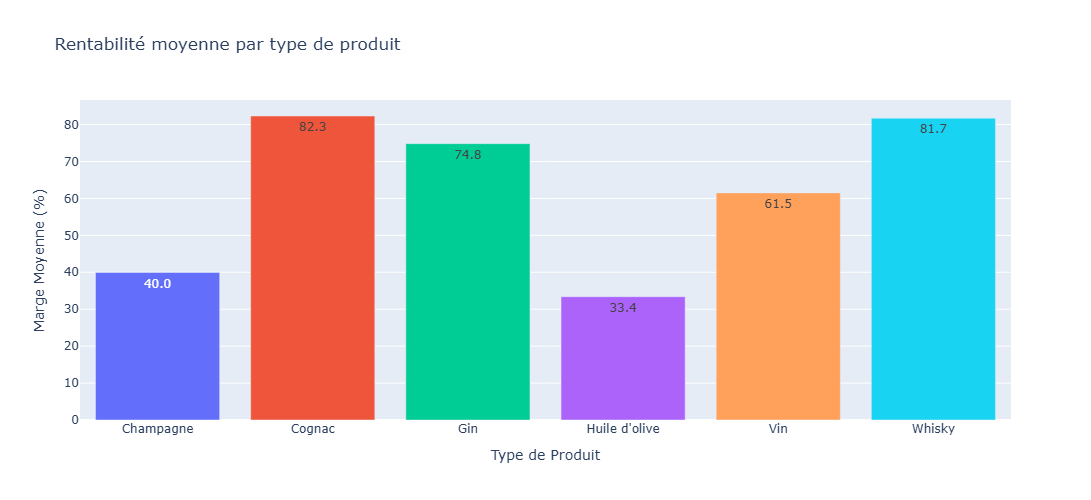

In [75]:
#Création d'un dataframe avec le taux de marge moyen par type de produit
df_marge_par_type = df_marge_analyse.groupby("product_type")["taux_marge"].mean().reset_index()

df_marge_par_type.columns = ["Type de Produit", "Marge Moyenne (%)"]

print("Marge moyenne par famille de produit :")
display(df_marge_par_type)
#Affichage dans un graphique du taux de marge par type de produit
fig = px.bar(df_marge_par_type, 
             x="Type de Produit", 
             y="Marge Moyenne (%)",
             title="Rentabilité moyenne par type de produit",
             color="Type de Produit",
             text_auto='.1f', # Affiche la valeur sur la barre avec 1 décimale
             height=500)

fig.update_layout(showlegend=False) # Pas besoin de légende si les barres sont nommées
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des corrélations entre les variables stock, sales et price</h3>
</div>

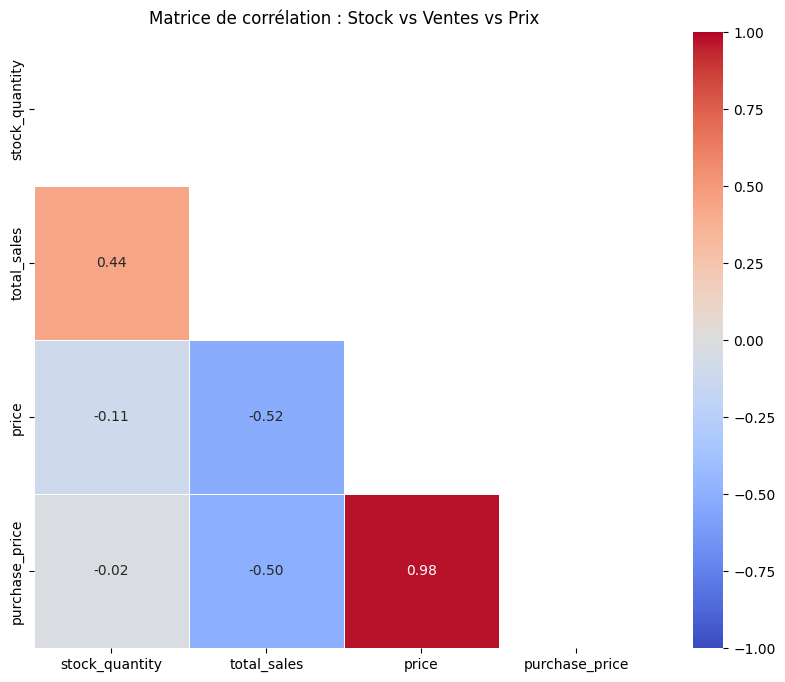

In [81]:
############################
# Analyse des corrélations #
############################

#Importation de Seaborn

#Création d'une heatmap de corrélation avec les variables stock, sales et price
#On peut également créer un mask pour n'afficher qu'une demi heatmap
cols_corr = ['stock_quantity', 'total_sales', 'price', 'purchase_price']

# 2. Calcul de la matrice de corrélation
# On utilise le dataframe nettoyé pour éviter que les anomalies faussent le résultat
corr_matrix = df_final[cols_corr].corr()

# 3. Création du masque pour n'afficher qu'une demi heatmap (triangle inférieur)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 4. Affichage de la Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5,
            vmin=-1, 
            vmax=1)

plt.title('Matrice de corrélation : Stock vs Ventes vs Prix')
plt.savefig('heatmap_correlation.png', bbox_inches='tight', dpi=300)
plt.show()

In [77]:

#Que peut-on conclure des corrélations ?
#corrélation n°1 : Prix vs prix d'achat =>> corrélation forte (proche de 1), cela signifie que les prix sont fixé de maniere cohérente afin d'avoir des taux de marge interressant pour l'entreprise.
#correlation n°2 : Prix  vs total_sales =>> Corrélation faible, le prix n'a pas d'influence direct sur le total des ventes. Les clients sont a la recherche de qualité sans prendre forcement le prix en compte.
#Corrélation n°3 : Stock_quatity vs total_sales =>> Corrélation positive mais assez faible, le stock de certain produit n'est surement pas en adécquation avec la demande clientèle.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mise à disposition de la nouvelle table sur un fichier Excel</h3>
</div>

In [78]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut être utile pour partager le résultat du dataset obtenu avec les équipes.  

In [79]:
# Export du dataframe final nettoyé vers un fichier Excel
# On utilise le dataframe 'df_marge_analyse' 

# On définit le nom du fichier
filename = "analyse_ventes_bottleneck_final.xlsx"

# On lance l'export (index=False évite d'avoir une colonne de numérotation inutile)
if 'df_marge_analyse' in locals():
    df_marge_analyse.to_excel(filename, index=False)
    print(f"Le fichier '{filename}' a été généré avec succès.")
else:
    # Au cas où, on utilise df_final par défaut
    df_final.to_excel(filename, index=False)
    print(f"Le fichier '{filename}' a été généré (attention : basé sur df_final non filtré).")

Le fichier 'analyse_ventes_bottleneck_final.xlsx' a été généré avec succès.


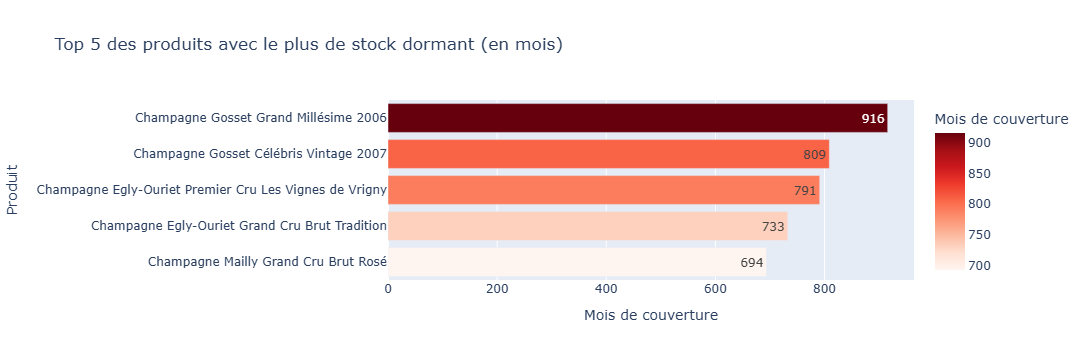

In [80]:
top_5_stock = df_ventes_actives[['post_title', 'mois_de_stock']].sort_values(by='mois_de_stock', ascending=False).head(5)

# Création du graphique
fig = px.bar(top_5_stock, 
             x='mois_de_stock', 
             y='post_title', 
             orientation='h',
             title='Top 5 des produits avec le plus de stock dormant (en mois)',
             labels={'mois_de_stock': 'Mois de couverture', 'post_title': 'Produit'},
             text_auto='.0f', # Affiche la valeur arrondie sur la barre
             color='mois_de_stock',
             color_continuous_scale='Reds') # Rouge pour signaler l'alerte

fig.update_layout(yaxis={'categoryorder':'total ascending'}) # Trie du plus grand au plus petit
fig.show()